<a href="https://colab.research.google.com/github/SuyogPatgave/Python_Codes-Projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### FALL-2023, AIT-526 FINAL PROJECT, TEAM-3

#SENTIMENT ANALYSIS ON AMAZON PRODUCT REVIEWS

-We initiate with loading/installing necessary packages, libraries, and other resources.

-Import the IMDb dataset for training the model.

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load IMDb dataset
imdb = pd.read_csv("/content/IMDB Dataset.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Data pre-processing

At this stage we perform data pre-processing. This is one of the crucial steps to make sure the data is clean and doesn't contain any redundancy.

Here we are dfining preprocess_text function that performs tokenization, stop words removal, and removal of websites and email addresses.

We intended to keep certain words in their naturally occuring form and decided not to lemmatize or stem.

In [ ]:
# Function for preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Remove emails and websites
    tokens = [word for word in tokens if not re.match(r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$', word)]
    tokens = [word for word in tokens if not re.match(r'^https?:\/\/.*[\r\n]*', word)]

    return ' '.join(tokens)


In [ ]:
# Apply preprocessing to the "review" column and overwrite it
imdb['review'] = imdb['review'].apply(preprocess_text)

# Display the preprocessed data
print("Length of IMDb File:", len(imdb))
print("Sample of Preprocessed Data:")
print(imdb[['review']].head())

Length of IMDb File: 50000
Sample of Preprocessed Data:
                                              review
0  One reviewers mentioned watching Oz episode ho...
1  wonderful little production br br filming tech...
2  thought wonderful way spend time hot summer we...
3  Basically family little boy Jake thinks zombie...
4  Petter Mattei Love Time Money visually stunnin...


Here we get the pre-processed IMDb dataset with the pre-processed text on the left adn sentiment on the right.

In [ ]:
print(imdb.head())

                                              review sentiment
0  One reviewers mentioned watching Oz episode ho...  positive
1  wonderful little production br br filming tech...  positive
2  thought wonderful way spend time hot summer we...  positive
3  Basically family little boy Jake thinks zombie...  negative
4  Petter Mattei Love Time Money visually stunnin...  positive


# Splitting Data

Here we are defining the output variable and the predictor variables. The dataset is now being split into training and testing dataset including X and Y which are the predictor and output variables.

In [ ]:
from sklearn.model_selection import train_test_split

X = imdb['review']
y = imdb['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (40000,) (40000,)
Testing set shape: (10000,) (10000,)


# Vectorization

We are performing the TF-IDF vectorization on the training and testing dataset of the predictor variable.

This helps in understanding the frequency of the a particular word and it helps converting the words in to numerical vectors. This allows the model to work on the textual data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
#tfidf_vectorizer
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF matrix shape (training):", X_train_tfidf.shape)
print("TF-IDF matrix shape (testing):", X_test_tfidf.shape)

TF-IDF matrix shape (training): (40000, 5000)
TF-IDF matrix shape (testing): (10000, 5000)


In [ ]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Assuming X_train_tfidf and y_train are already defined (TF-IDF vectors and corresponding labels)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # You can extend this list
    'max_depth': [None, 10, 20, 30],  # Add other hyperparameters to tune
    # Add more hyperparameters as needed
}

# Use accuracy as the scoring metric
scorer = make_scorer(accuracy_score)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Display the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import make_scorer, accuracy_score\n\n# Assuming X_train_tfidf and y_train are already defined (TF-IDF vectors and corresponding labels)\n\n# Create a RandomForestClassifier\nrf_classifier = RandomForestClassifier(random_state=42)\n\n# Define the parameter grid to search\nparam_grid = {\n    \'n_estimators\': [50, 100, 150, 200],  # You can extend this list\n    \'max_depth\': [None, 10, 20, 30],  # Add other hyperparameters to tune\n    # Add more hyperparameters as needed\n}\n\n# Use accuracy as the scoring metric\nscorer = make_scorer(accuracy_score)\n\n# Perform grid search with 5-fold cross-validation\ngrid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=scorer, cv=5)\ngrid_search.fit(X_train_tfidf, y_train)\n\n# Display the best parameters and corresponding accuracy\nprint("Best Parameters:", grid_search.best_params_)\nprint("B

# Hyperparameter tuning for Random Forest

Wde include additional libraries from Scikit learn that are required for hyperparameter tuning process.

Here, we have set a range of a single hyperparameter= n_estimator which is essentially the total number of decision trees in the random forest model. We conduct this so that we can find the optimum numner of decision trees and the accuracy for that specific number.

Here we have considered 3 different values for n_estimators. This is due to the limitation on the computational power and the time consumption over the loop for finding the best hyperparameter.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Assuming X_train_tfidf and y_train are already defined (TF-IDF vectors and corresponding labels)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # You can adjust this list
}

# Use accuracy as the scoring metric
scorer = make_scorer(accuracy_score)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Display the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'n_estimators': 200}
Best Accuracy: 0.8510000000000002


# Random Forest model training and Testing

We get the accuracy of the random forest model by fitting the testing dataset and applying the best hyperparameters from the results above.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_tfidf, y_train, X_test_tfidf, and y_test are already defined

# Create a RandomForestClassifier with the best n_estimators
best_n_estimators = grid_search.best_params_['n_estimators']
final_rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)

# Train the model on the entire training dataset
final_rf_model.fit(X_train_tfidf, y_train)

# Predictions on the testing set
y_pred = final_rf_model.predict(X_test_tfidf)

# Evaluate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy on Testing Set:", accuracy)


Final Model Accuracy on Testing Set: 0.8543


## Adaboost

Similar to Random Forest model, we do hyperparameter tuning for Adaboost model to find the best n_estimator value with higher accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Assuming X_train_tfidf and y_train are already defined (TF-IDF vectors and corresponding labels)

# Create an AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Define the parameter grid to search
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],  # You can adjust this list
}

# Use accuracy as the scoring metric
scorer_adaboost = make_scorer(accuracy_score)

# Perform grid search with 5-fold cross-validation
grid_search_adaboost = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid_adaboost, scoring=scorer_adaboost, cv=5)
grid_search_adaboost.fit(X_train_tfidf, y_train)

# Display the best parameters and corresponding accuracy
print("Best Parameters for AdaBoost:", grid_search_adaboost.best_params_)
print("Best Accuracy for AdaBoost:", grid_search_adaboost.best_score_)


Best Parameters for AdaBoost: {'n_estimators': 200}
Best Accuracy for AdaBoost: 0.842625


## Comparing accuracies of two models

Here we find that the Random Forest model has outperformed by having slightly higher accuracy.

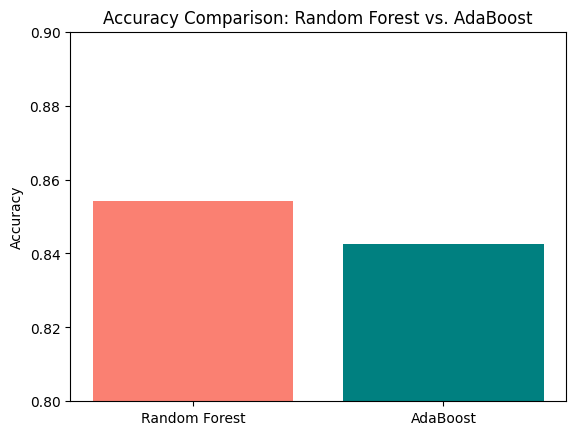

In [ ]:
import matplotlib.pyplot as plt

# Assuming accuracy and grid_search_adaboost are already defined

# Get the best accuracy for AdaBoost from the grid search results
best_accuracy_adaboost = grid_search_adaboost.best_score_

# Model names and corresponding accuracies
model_names = ['Random Forest', 'AdaBoost']
accuracies = [accuracy, best_accuracy_adaboost]

# Plotting the bar chart
plt.bar(model_names, accuracies, color=['salmon', 'teal'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Random Forest vs. AdaBoost')
plt.ylim(0.8, 0.9)  # Adjust the y-axis limits based on your accuracy range
plt.show()

# Training the Random Forest model on IMDb dataset

We are now considering to use the entire dataset rather than just the training dataset. The model will be ready for predicting sentiments on the Amazon dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the IMDb dataset
#imdb = pd.read_csv("/content/IMDB Dataset.csv")

# Assuming 'review' is already preprocessed
X_imdb = imdb['review']
y_imdb = imdb['sentiment']

# Create a TF-IDF vectorizer with the same configuration as used during training
tfidf_vectorizer_imdb = TfidfVectorizer(max_features=5000)
X_imdb_tfidf = tfidf_vectorizer_imdb.fit_transform(X_imdb)

# Create the RandomForestClassifier with n_estimators=200
final_rf_model_imdb = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the entire IMDb dataset
final_rf_model_imdb.fit(X_imdb_tfidf, y_imdb)


RandomForestClassifier(n_estimators=200, random_state=42)

# Prediction


Import Amazon Dataset

In [ ]:
amazon = pd.read_csv("/content/Reviews.csv")

Data visualization to count the frequency of each score

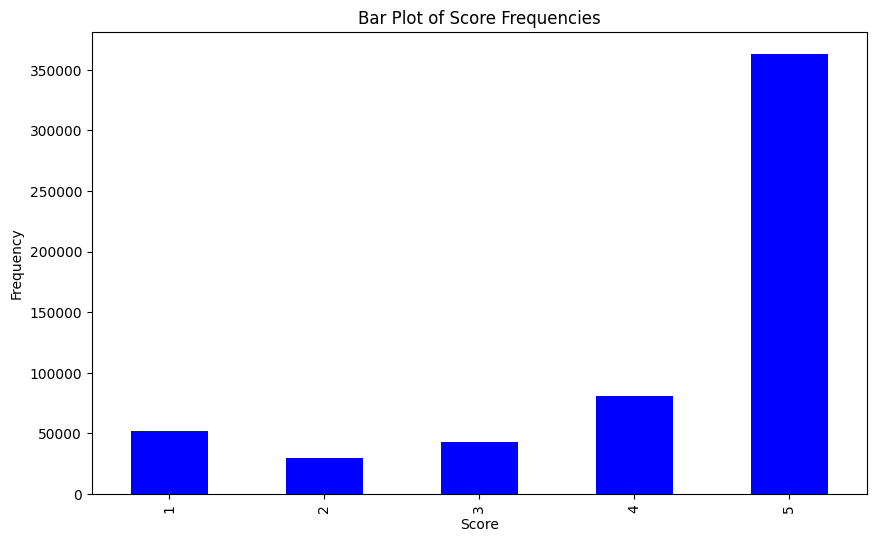

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and "score" is the column you want to plot
# Use the sample method to get a random sample of 20,000 rows
#sampled_df = df.sample(n=20000, random_state=42)

# Use value_counts to count the frequency of each score
score_counts = amazon['Score'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
score_counts.sort_index().plot(kind='bar', color='blue')  # Sort by index for better visualization
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Bar Plot of Score Frequencies')
plt.show()


Loading additional required libraries and packages

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# Scale-down Amazon dataset

You can see in the first line as a comment is a command that we initially passed to scale down the dataset from 500k to 20k.

As cited in the README file, you may import the Amazon1.csv file directly to skip the sampling of the original dataset for convenience.

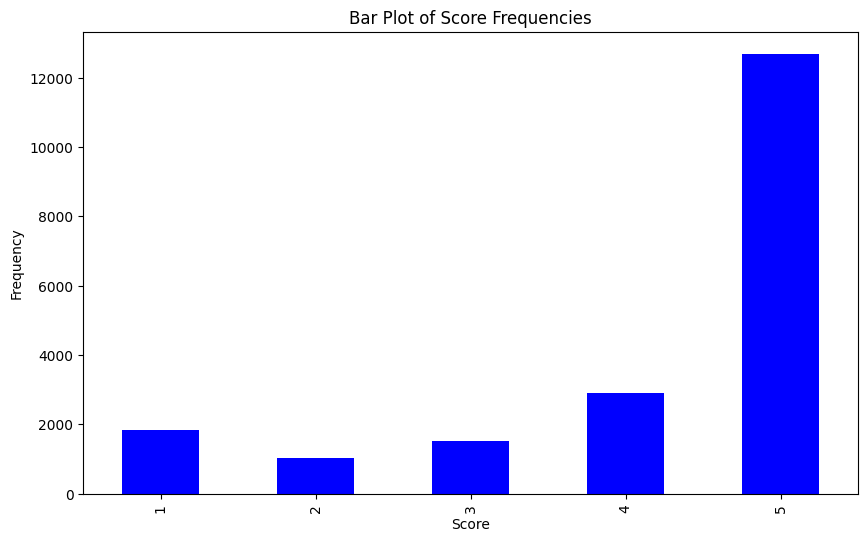

In [ ]:
#amazon_1 = amazon.sample(n=20000, random_state=42).reset_index(drop=True)
import pandas as pd
amazon_1 = pd.read_csv("/content/Amazon1.csv")
score_counts = amazon_1['Score'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
score_counts.sort_index().plot(kind='bar', color='blue')  # Sort by index for better visualization
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Bar Plot of Score Frequencies')
plt.show()


In [ ]:
len(amazon_1)

20000

In [ ]:
amazon_1= amazon_1[['ProductId', 'UserId', 'ProfileName', 'Score', 'Text']]
amazon_1.head()

,ProductId,UserId,ProfileName,Score,Text
0,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",5,tried couple brands sandwich cookies best bunc...
1,B0000BXJIS,A3U62RE5XZDP0G,Marty,5,cat loves treats ever ca find house pop top bo...
2,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,3,little less expected tends muddy taste expecte...
3,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,2,First Frosted original size Frosted Bite Size ...
4,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,5,want congratulate graphic artist putting entir...


Performing pre-processing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
%%time
# Apply preprocessing to the "review" column and overwrite it
amazon_1['Text'] = amazon_1['Text'].apply(preprocess_text)

CPU times: user 9.68 s, sys: 404 ms, total: 10.1 s
Wall time: 10.2 s


TF-IDF vectorization

In [ ]:
X= amazon_1['Text']
X_tfidf= tfidf_vectorizer.fit_transform(X)

# Prediction

In [ ]:
predictions=final_rf_model_imdb.predict(X_tfidf)

Create a new column called 'sentiment' where the predictions will be stored.

In [ ]:
amazon_1['sentiment']= predictions

In [ ]:
amazon_1.head()

,ProductId,UserId,ProfileName,Score,Text,sentiment
0,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",5,tried couple brands sandwich cookies best bunc...,positive
1,B0000BXJIS,A3U62RE5XZDP0G,Marty,5,cat loves treats ever ca find house pop top bo...,positive
2,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,3,little less expected tends muddy taste expecte...,positive
3,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,2,First Frosted original size Frosted Bite Size ...,negative
4,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,5,want congratulate graphic artist putting entir...,positive


# Final comparison of Review sentiment and rating provided

This code output and plot essentially answers the original question of understanding the comparison of reviews and ratings.

We can conclude that certain users even though they provide higer ratings, their sentiment could still be negative. Meanwhile, when the ratings are lowest, the sentiments expressed thorugh the reviews are still majorly positive.

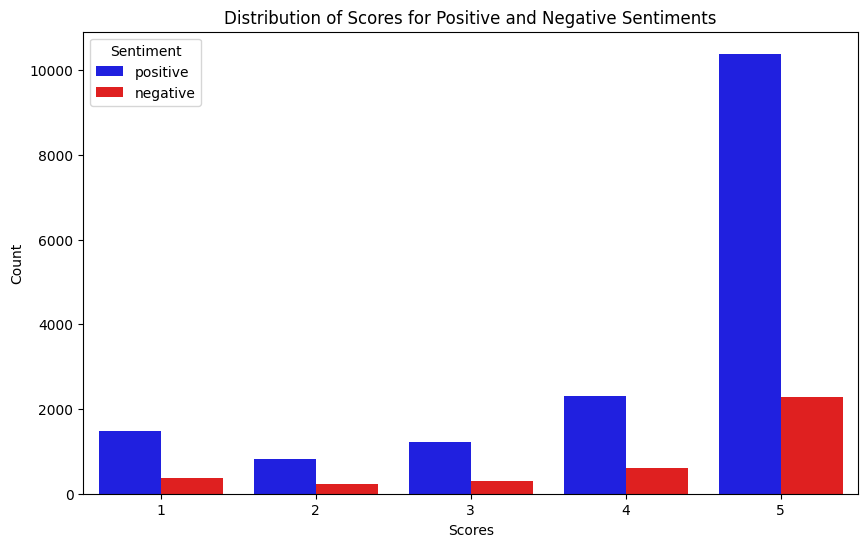

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with columns "sentiment" and "scores"
# Use the sample method to get a random sample of 20,000 rows
#amazon_1 = df.sample(n=20000, random_state=42)

# Create a grouped bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Using seaborn to create a grouped bar plot
sns.countplot(data=amazon_1, x='Score', hue='sentiment', palette=['blue', 'red'])

plt.xlabel('Scores')
plt.ylabel('Count')
plt.title('Distribution of Scores for Positive and Negative Sentiments')
plt.legend(title='Sentiment')
plt.show()


In [ ]:
#amazon_1.to_csv('Amazon1.csv')

In [ ]:
amazon_1.head()

,ProductId,UserId,ProfileName,Score,Text,sentiment
0,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",5,tried couple brands sandwich cookies best bunc...,positive
1,B0000BXJIS,A3U62RE5XZDP0G,Marty,5,cat loves treats ever ca find house pop top bo...,positive
2,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,3,little less expected tends muddy taste expecte...,positive
3,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,2,First Frosted original size Frosted Bite Size ...,negative
4,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,5,want congratulate graphic artist putting entir...,positive


# Additional Extended Analysis

## Top 5 best product based on reviews and score

    ProductId          UserId             ProfileName  Score  \
0  B000EVG8J2  A1L01D2BD3RKVO  B. Miller "pet person"      5   
1  B0000BXJIS  A3U62RE5XZDP0G                   Marty      5   
2  B008FHUFAU   AOXC0JQQZGGB6         Kenneth Shevlin      3   
3  B006BXV14E  A3PWPNZVMNX3PA             rareoopdvds      2   
4  B007I7Z3Z0  A1XNZ7PCE45KK7                  Og8ys1      5   

                                                Text sentiment  
0  tried couple brands sandwich cookies best bunc...  positive  
1  cat loves treats ever ca find house pop top bo...  positive  
2  little less expected tends muddy taste expecte...  positive  
3  First Frosted original size Frosted Bite Size ...  negative  
4  want congratulate graphic artist putting entir...  positive  


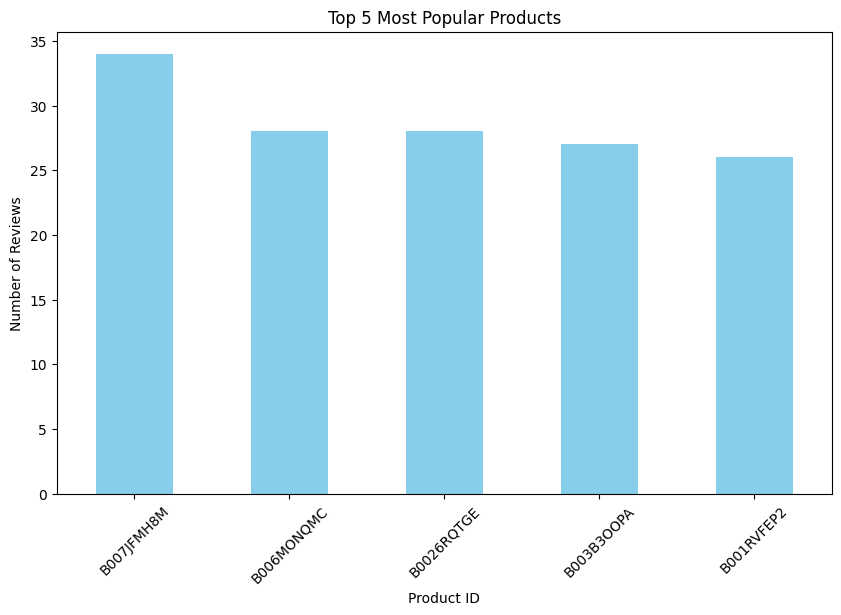

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called 'df'
# Replace 'your_dataset.csv' with the actual file path or DataFrame variable name

# Example loading from a CSV file
# df = pd.read_csv('your_dataset.csv')

# Display the first few rows of the dataset for reference
print(amazon_1.head())

# Calculate the frequency distribution of each unique product
product_counts = amazon_1['ProductId'].value_counts()

# Identify the top 5 most popular products
top_products = product_counts.head(5)

# Visualize the popularity of these products using a bar chart
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Popular Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


## User based reviews and their scores

    ProductId          UserId             ProfileName  Score  \
0  B000EVG8J2  A1L01D2BD3RKVO  B. Miller "pet person"      5   
1  B0000BXJIS  A3U62RE5XZDP0G                   Marty      5   
2  B008FHUFAU   AOXC0JQQZGGB6         Kenneth Shevlin      3   
3  B006BXV14E  A3PWPNZVMNX3PA             rareoopdvds      2   
4  B007I7Z3Z0  A1XNZ7PCE45KK7                  Og8ys1      5   

                                                Text sentiment  
0  tried couple brands sandwich cookies best bunc...  positive  
1  cat loves treats ever ca find house pop top bo...  positive  
2  little less expected tends muddy taste expecte...  positive  
3  First Frosted original size Frosted Bite Size ...  negative  
4  want congratulate graphic artist putting entir...  positive  


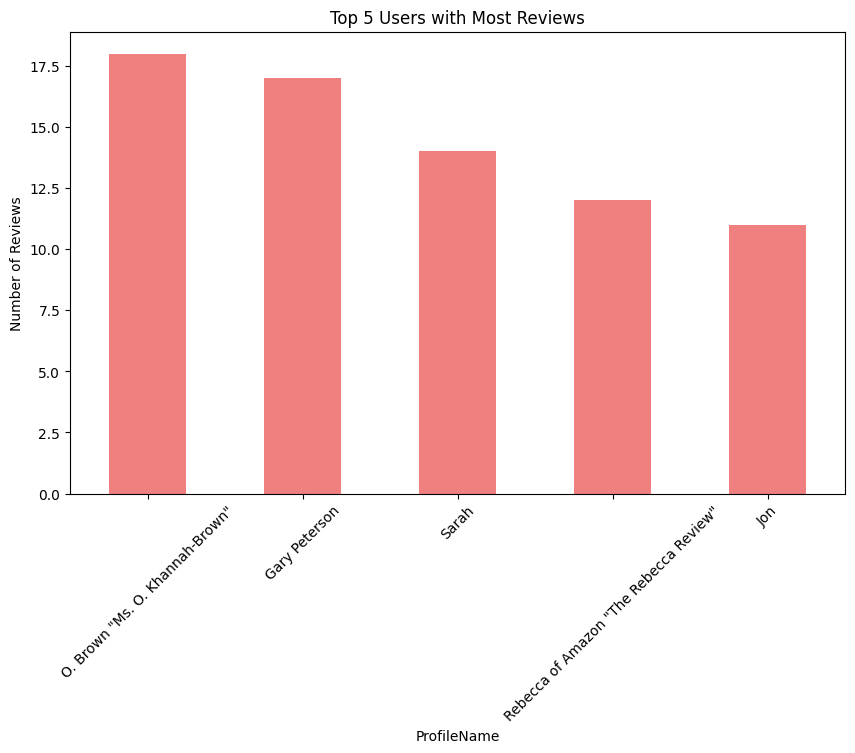

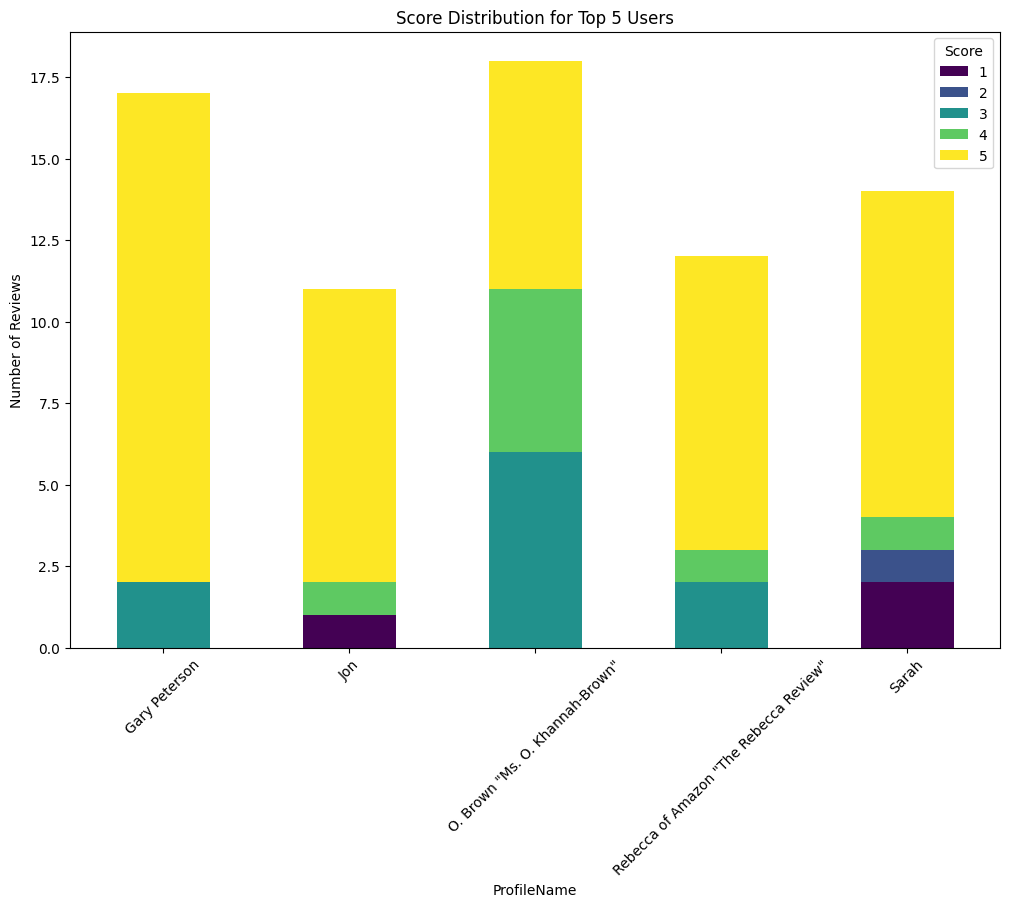

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called 'df'
# Replace 'your_dataset.csv' with the actual file path or DataFrame variable name

# Example loading from a CSV file
# df = pd.read_csv('your_dataset.csv')

# Display the first few rows of the dataset for reference
print(amazon_1.head())

# Identify the top 5 users who have provided the most reviews
top_users = amazon_1['ProfileName'].value_counts().head(5)

# Visualize the distribution of reviews for the top 5 users
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Users with Most Reviews')
plt.xlabel('ProfileName')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Analyze the distribution of scores given by the top users
top_users_amazon_1 = amazon_1[amazon_1['ProfileName'].isin(top_users.index)]
score_distribution_by_user = top_users_amazon_1.groupby('ProfileName')['Score'].value_counts().unstack()

# Visualize the score distribution for the top users
score_distribution_by_user.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Score Distribution for Top 5 Users')
plt.xlabel('ProfileName')
plt.ylabel('Number of Reviews')
plt.legend(title='Score')
plt.xticks(rotation=45)
plt.show()


In [ ]:
amazon_1.head()

,ProductId,UserId,ProfileName,Score,Text,sentiment
0,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",5,tried couple brands sandwich cookies best bunc...,positive
1,B0000BXJIS,A3U62RE5XZDP0G,Marty,5,cat loves treats ever ca find house pop top bo...,positive
2,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,3,little less expected tends muddy taste expecte...,positive
3,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,2,First Frosted original size Frosted Bite Size ...,negative
4,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,5,want congratulate graphic artist putting entir...,positive
